In [5]:
#pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [6]:
#pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.5 MB 20.5 MB/s eta 0:00:01
   ------ --------------------------------- 2.0/11.5 MB 21.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.4/11.5 MB 23.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.8/11.5 MB 25.6 MB/s eta 0:00:01
   ---------------------- ----------------- 6.6/11.5 MB 28.1 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 29.8 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 30.4 MB/s eta 0:00:01
   -------------------------------------- - 10.9/11.5 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.5 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 28.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/505.5 kB ? eta -:--:--
   --------------------------------------- 505.5/505.5 kB 16.0 MB/s eta 0:0

In [1]:
import requests
from bs4 import BeautifulSoup

def WebScrapper(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content , 'html.parser')

    #Extract the title of the Wikipedia page
    title = soup.find(id = "firstHeading")
    print(f"Title : {title.text}\n")

    #Extract all para in the main content
    paragraphs = soup.find_all("p")
    for para in paragraphs:
        print(para.get_text())

#Start scraping from the intial Wikipedia article
WebScrapper("https://en.wikipedia.org/wiki/Spider-Man")

Title : Spider-Man





Spider-Man is a superhero in American comic books published by Marvel Comics. Created by writer-editor Stan Lee and artist Steve Ditko, he first appeared in the anthology comic book Amazing Fantasy #15 (August 1962) in the Silver Age of Comic Books. He has been featured in comic books, television shows, films, video games, novels, and plays.

Origin, Abilities and Supporting Characters:

Spider-Man's secret identity is Peter Benjamin Parker. Initially, Peter was depicted as a teenage high-school student and an orphan raised by his Aunt May and Uncle Ben in New York City after his parents, Richard and Mary Parker, died in a plane crash. Lee, Ditko, and later creators had the character deal with the struggles of adolescence and young adulthood and gave him many supporting characters, such as Flash Thompson, J. Jonah Jameson, and Harry Osborn; romantic interests Gwen Stacy, Mary Jane Watson, and the Black Cat; and enemies such as Doctor Octopus, the Green Goblin, a

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define headers for the HTTP request
HEADERS = {
 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
 'Accept-Language': 'en-US, en;q=0.5'
}

# Function to get HTML content from a URL
def get_html_content(url):
 response = requests.get(url, headers=HEADERS)
 response.raise_for_status()
 return response.text


# Function to parse the HTML and extract customer names and reviews
def scrape_amazon_reviews(url):
 html_content = get_html_content(url)
 soup = BeautifulSoup(html_content, 'html.parser')

 # Extract customer names
 customer_names = [item.get_text() for item in soup.find_all("span", class_="a-profile-name")]

 # Extract customer reviews
 reviews = [item.get_text().strip() for item in soup.find_all("div", class_="a-expander-content reviewText review-text-content a-expander-partial-collapse-content")]

 # Ensure both lists are of the same length
 min_length = min(len(customer_names), len(reviews))
 customer_names = customer_names[:min_length]
 reviews = reviews[:min_length]

 return customer_names, reviews

# URL of the product
url = "https://www.amazon.in/Nike-Sneaker-University-Black_9-_555088-134/dp/B08TW99KTG/ref=sr_1_3?crid=2A7QMNUZZSD04&dib=eyJ2IjoiMSJ9.mEWHVvn_o1xrEsYvF2AGPvHKjKJqT-7_FVBUT9SSSpnJdBieq67TOKLt6dWntu6JbyryUSaXltG4oj_36bo24KtBH8AB8eNJkQRmjzRjwEW-fR0Sv0VRmGhkFus5VNsp-jLmn2c7JYSdu3K-1VeQJVbI2EO2FNsWl3O2fTwt8R_ar0ZBCwV0_P7yWji7vk-_vE_dWXP-nr6LOVyXvTF6q_GI46Xtoy_IwCgpGO6H9rPbnzVccVmkvfGwmAhvrTh6OIyIUdzamHb6IRvvleTckP8lz_GvOGDH2F73UdMwDu8.nqVu1pZ3WZVKV79833BXbRBpLx_bbe0vgkp97zmTFy8&dib_tag=se&keywords=nike+jordan&qid=1720587836&sprefix=nike+jordon%2Caps%2C255&sr=8-3"

# Scrape the reviews and save to CSV
customer_names, reviews = scrape_amazon_reviews(url)

# Save the details into a CSV file
df = pd.DataFrame({'Name': customer_names, 'Review': reviews})
df.to_csv('amazon_review.csv', index=False)

print("Data has been successfully scraped and saved to 'amazon_review.csv'.") 

Data has been successfully scraped and saved to 'amazon_review.csv'.


## Word cloud

In [3]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
#pip install wordcloud

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
text = """Spider-Man is a superhero in American comic books published by Marvel Comics. Created by writer-editor Stan Lee and artist Steve Ditko, he first appeared in the anthology comic book Amazing Fantasy #15 (August 1962) in the Silver Age of Comic Books. He has been featured in comic books, television shows, films, video games, novels, and plays.
Spider-Man's secret identity is Peter Benjamin Parker. Initially, Peter was depicted as a teenage high-school student and an orphan raised by his Aunt May and Uncle Ben in New York City after his parents, Richard and Mary Parker, died in a plane crash. 
Lee, Ditko, and later creators had the character deal with the struggles of adolescence and young adulthood and gave him many supporting characters, such as Flash Thompson, J. Jonah Jameson, and Harry Osborn; romantic interests Gwen Stacy, Mary Jane Watson, and the Black Cat; and enemies such as Doctor Octopus, the Green Goblin, and Venom. In his origin story, Spider-Man gets his superhuman spider powers and abilities after being bitten by a radioactive spider. 
These powers include superhuman strength, agility, reflexes, stamina, durability, coordination, and balance; clinging to surfaces and ceilings like a spider; and detecting danger with his precognition ability called "spider-sense". He builds wrist-mounted "web-shooter" devices that shoot artificial spider-webs of his own design, which he uses both for fighting and web-swinging across the city. Peter Parker initially used his powers for his personal gain, but after his Uncle Ben was killed by a thief that Peter could not stop, he began to use his powers to fight crime by becoming Spider-Man."""

In [7]:
#tokenize the text
tokens = word_tokenize(text.lower())

Word Frequency:
comic: 4
peter: 4
powers: 4
books: 3
parker: 3
spider: 3
lee: 2
ditko: 2
initially: 2
uncle: 2


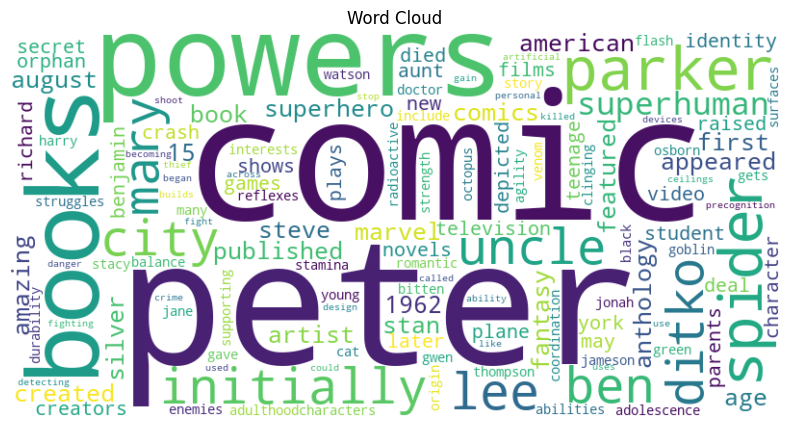

In [8]:
#remove punctuation and stop words
stop_words = set(stopwords.words('english'))
words = [word for word in tokens if word.isalnum() and word not in stop_words]

#calculate word frequency
words_freq = Counter(words)

#print the most common words
print('Word Frequency:')
for word , freq in words_freq.most_common(10):
    print(f"{word}: {freq}")

#Generate and display a word cloud
wordCloud = WordCloud(width = 800 , height = 400 , background_color='white').generate_from_frequencies(words_freq)

#Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

In [9]:
#pip install demoji emoji

In [10]:
import emoji

text = "hello , Just had the best pizza ever! 🍕😍"
print(emoji.demojize(text))

hello , Just had the best pizza ever! :pizza::smiling_face_with_heart-eyes:


In [11]:
import demoji

tweet = """Just got back from an amazing hike in the mountains! 🌄🏞️
Can't believe how beautiful the sunset was! 🌅😍"""
tweet_without = demoji.replace(tweet , "")
print(tweet_without)

Just got back from an amazing hike in the mountains! 
Can't believe how beautiful the sunset was! 


In [12]:
emojis_find = demoji.findall(tweet)
print(emojis_find)

{'🌅': 'sunrise', '🌄': 'sunrise over mountains', '🏞️': 'national park', '😍': 'smiling face with heart-eyes'}


## Sentence Similarity

In [13]:
#!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/42.8 MB 1.6 MB/s eta 0:00:28
     ---------------------------------------- 0.2/42.8 MB 1.8 MB/s eta 0:00:24
     ---------------------------------------- 0.3/42.8 MB 2.0 MB/s eta 0:00:22
     ---------------------------------------- 0.4/42.8 MB 1.9 MB/s eta 0:00:23
      --------------------------------------- 0.5/42.8 MB 2.1 MB/s eta 0:00:20
      --------------------------------------- 0.6/42.8 MB 2.1 MB/s eta 0:00:20
      --------------------------------------- 0.7/42.8 MB 1.9 MB/s eta 0:00:22
      --------------------------------------- 0.9/42.8 MB 2.1 MB/s eta 0:00:21
      --------------------------------------- 0.9/42.8 MB 2.1 MB/s eta 0:00:20
      --------------------------------------- 1.1/42.8 MB 2.1 MB/s eta 0:00:20
     - -------------------------------------- 1.1/42.8 MB 2.1 MB/s

In [14]:
#pip install nltk
import spacy
from nltk.corpus import wordnet

In [15]:


#lead the spacy model
nlp = spacy.load("en_core_web_md")
    
def word_similarity(word1 , word2):
    """
    calculate similarity between 2 words using WordNet from NLTK
    """
    synset1 = wordnet.synsets(word1)[0]
    synset2 = wordnet.synsets(word2)[0]
    similarity = synset1.wup_similarity(synset2)
    return similarity

In [16]:

def sentence_similarity(sentence1 , sentence2):

    doc1 = nlp(sentence1)
    doc2 = nlp(sentence2)
    similarity = doc1.similarity(doc2)
    return similarity

word1 = "dog"
word2 = "cat"
word_sim = word_similarity(word1 , word2)
print(f"similarity between words ' {word1}' and '{word2}' : {word_sim :},4f")

sentence1 = "The quick the brown fox jumps over the lazy dog"
sentence2 = "A fast dark fox leaps ovar a sleepy dog."
sent_sim = sentence_similarity(sentence1 , sentence2)
print(f"similarity between sentences : \n ' {sentence1}' and '{sentence2}' : {sent_sim}:4f")

similarity between words ' dog' and 'cat' : 0.8571428571428571,4f
similarity between sentences : 
 ' The quick the brown fox jumps over the lazy dog' and 'A fast dark fox leaps ovar a sleepy dog.' : 0.6797347294606111:4f


# Grammar Checker tool

In [1]:
pip install language-tool-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import language_tool_python

def grammer_check(text):

    tool = language_tool_python.LanguageTool('en_US')

    matches = tool.check(text)
    print(matches)

    print("Original text:")
    print(text)

    corrected_text = tool.correct(text)
    print("Corrected text:")
    print(corrected_text)

text = "This is a example of text with bad grammer and spelling mistakes."
grammer_check(text)

Unzipping C:\Users\Kush\AppData\Local\Temp\tmpexmr72r8.zip to C:\Users\Kush\.cache\language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to C:\Users\Kush\.cache\language_tool_python.


[Match({'ruleId': 'EN_A_VS_AN', 'message': 'Use “an” instead of ‘a’ if the following word starts with a vowel sound, e.g. ‘an article’, ‘an hour’.', 'replacements': ['an'], 'offsetInContext': 8, 'context': 'This is a example of text with bad grammer and sp...', 'offset': 8, 'errorLength': 1, 'category': 'MISC', 'ruleIssueType': 'misspelling', 'sentence': 'This is a example of text with bad grammer and spelling mistakes.'}), Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['grammar', 'grimmer', 'crammer'], 'offsetInContext': 35, 'context': 'This is a example of text with bad grammer and spelling mistakes.', 'offset': 35, 'errorLength': 7, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'This is a example of text with bad grammer and spelling mistakes.'})]
Original text:
This is a example of text with bad grammer and spelling mistakes.
Corrected text:
This is an example of text with bad grammar and spelling mistake

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

#Download the VADER lexicon
nltk.download('vader_lexicon')

#Intialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

#Sample text data
texts=[
    "I love this product! It's absolutely amazing.",
    "This is the worst experience I've ever had.",
    "It's okay , not great but not bad either.",
    "There is no one who know me.",
    "Go away! This is the worst project."
]

#Create a DF to store the text and sentiment scores
df= pd.DataFrame(texts , columns=["text"])

#Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

#Apply the function to the DataFrame
df['sentiment_scores'] = df['text'].apply(get_sentiment_scores)
display(df)

#Split sentiment scores into separate columns
df = pd.concat([df.drop(['sentiment_scores'] , axis = 1) , df['sentiment_scores'].apply(pd.Series)] , axis=1)

display(df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,sentiment_scores
0,I love this product! It's absolutely amazing.,"{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'comp..."
1,This is the worst experience I've ever had.,"{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'comp..."
2,"It's okay , not great but not bad either.","{'neg': 0.174, 'neu': 0.404, 'pos': 0.422, 'co..."
3,There is no one who know me.,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp..."
4,Go away! This is the worst project.,"{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp..."


,text,neg,neu,pos,compound
0,I love this product! It's absolutely amazing.,0.000,0.318,0.682,0.8620
1,This is the worst experience I've ever had.,0.369,0.631,0.000,-0.6249
2,"It's okay , not great but not bad either.",0.174,0.404,0.422,0.4728
3,There is no one who know me.,0.268,0.732,0.000,-0.2960
4,Go away! This is the worst project.,0.423,0.577,0.000,-0.6588


In [8]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------- -------------------------------- 112.6/626.3 kB 3.3 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/626.3 kB 4.6 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from textblob import TextBlob
import pandas as pd

#Sample text data
texts=[
    "I love this product! It's absolutely amazing.",
    "This is the worst experience I've ever had.",
    "It's okay , not great but not bad either.",
    "There is no one who know me.",
    "Go away! This is the worst project."
]

#Create a DataFrame to store the text and sentiment scores
df = pd.DataFrame(texts, columns = ['text'])

#Function to get polarity and subjectivity using Blob
def get_polarity_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Function to get sentiment based on polarity
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Postive'

#Apply the function to the DataFrame
df[['polarity' , 'subjectivity']] = df['text'].apply(get_polarity_subjectivity).apply(pd.Series) 

df['analysis'] = df['polarity'].apply(get_analysis)

display(df)

,text,polarity,subjectivity,analysis
0,I love this product! It's absolutely amazing.,0.6125,0.750000,Postive
1,This is the worst experience I've ever had.,-1.0000,1.000000,Negative
2,"It's okay , not great but not bad either.",0.1500,0.638889,Postive
3,There is no one who know me.,0.0000,0.000000,Neutral
4,Go away! This is the worst project.,-1.0000,1.000000,Negative
